# Task 7: Basic Sales Summary from SQLite Database

In [1]:
# 1. Import Required Libraries

import sqlite3                    # To connect and interact with SQLite database
import pandas as pd               # To handle and manipulate data
import matplotlib.pyplot as plt   # To create visualizations


In [2]:
# 2. Connect to SQLite Database
conn = sqlite3.connect("sales_data.db")   # Connect to the database file

In [3]:
# 3. Create a cursor object to execute SQL commands
cursor = conn.cursor()

In [4]:
# 4. Create the 'sales' table if it doesn't already exist
# The table includes: id, product_name, quantity, and price

cursor.execute("""
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product_name TEXT,
        quantity INTEGER,
        price REAL
    )

""")

In [5]:
# 5. Insert sample sales records into the table

cursor.execute("INSERT INTO sales (product_name, quantity, price) VALUES (?, ?, ?)", ("Product A", 10, 10.0))
cursor.execute("INSERT INTO sales (product_name, quantity, price) VALUES (?, ?, ?)", ("Product B", 5, 20.0))
cursor.execute("INSERT INTO sales (product_name, quantity, price) VALUES (?, ?, ?)", ("Product C", 2, 50.0))

# Save (commit) the changes to the database
conn.commit()
# Close the database connection
conn.close()

In [6]:
# 6. Connect to SQLite database
conn = sqlite3.connect("sales_data.db")

In [7]:
# 7. Define and Run SQL Query
# This query calculates total quantity and revenue for each product

query = """
    SELECT product_name,
           SUM(quantity) AS total_qty,
           SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product_name
"""

In [8]:
# 8. Load Query Results into a DataFrame
df = pd.read_sql_query(query, conn)   # Run the query and load result into pandas

In [9]:
# 9. Display Data in Console
print("Sales Summary:")
print(df)   # Print the summary table

Sales Summary:
  product_name  total_qty  revenue
0    Product A         10    100.0
1    Product B          5    100.0
2    Product C          2    100.0


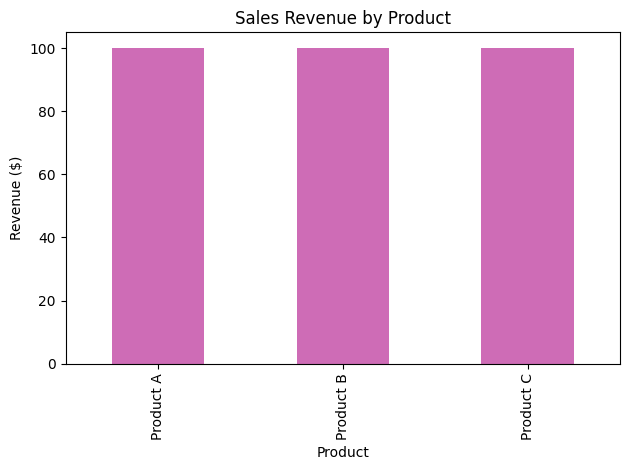

In [10]:
# 10. Create a Bar Chart for Revenue by Product
# Plotting revenue per product using a simple bar chart

df.plot(kind='bar', x='product_name', y='revenue', legend=None, color='#ce6cb6')
plt.title('Sales Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

In [11]:
# 11. Save and Show the Chart
plt.savefig("sales_chart.png")  # Save the chart as an image
plt.show()                      # Display the chart

<Figure size 640x480 with 0 Axes>

In [12]:
# 12. Close the connection
conn.close()